<a href="https://colab.research.google.com/github/Steven-Macas/SAA/blob/Pandas/stevenMacas_naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## NAIVE BAYES

Para cada uno de ellos realizar un documento de google colab con los siguientes epígrafes y tareas:


---


A Importación de librerías necesarias


---



B Preproceso

◦ Importación de los datos del dataset

◦ Mostrar las primeras y últimas filas del dataframe importado

◦ Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

◦ Mostrar un mapa de calor que indique la correlación entre variables

◦ Seleccionar las características a tener en cuenta en el estudio

◦ Separar datos entre datos de entrada y etiquetas (resultados)

◦ Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para
test)


---



C Entrenamiento y predicción

◦ Elegir, instanciar y entrenar el modelo

◦ Realizar una predicción con los datos de prueba



---


D Evaluación

◦ Mostrar el porcentaje de elementos correctamente clasificados

◦ Mostrar la predicción realizada (imprimir la variable con la predicción)

◦ Representar gráficamente la clasificación obtenida (matriz de confusión)



---


E Optimización (probar el proceso con distintos clasificadores)

◦ Finalmente prueba los distintos clasificadores y realiza una pequeña comparativa indicando

cuál obtiene mejores resultados.

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

---

# **A** -Importación de librerías

In [82]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

---


# **B** - Preproceso

In [68]:
data = pd.read_csv('WineQT.csv') #Dataset del vino
data2 = pd.read_csv('heart.csv') #Dataset del heart



---



In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [61]:
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [ ]:
data2.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,4,110,264,0,1,132,0,1.2,1.0,1
914,68,1,3,144,193,1,1,141,0,3.4,1.0,1
915,57,1,3,130,131,0,1,115,1,1.2,1.0,1
916,57,2,1,130,236,0,2,174,0,0.0,1.0,1
917,38,1,2,138,175,0,1,173,0,0.0,0.0,0


In [69]:
data2.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Cambiar valores

Columna sex 

M = 1

F = 2

Columna ChestPainType 

ATA = 1

NAP = 2

ASY = 3

TA = 4

Columna RestingEGC 

Normal = 1

ST = 0

LVH = 2

Columna ExerciseAngine 

N = 0

Y = 1

Columna ST_Slope 

Down = 2

Up = 1

Flat = 0

In [70]:
data2 = data2.replace('M', '1', regex=True)
data2 = data2.replace('F', '2', regex=True)
data2['Sex'] = pd.to_numeric(data2['Sex'],errors='coerce')

data2 = data2.replace('ATA', '1', regex=True)
data2 = data2.replace('NAP', '2', regex=True)
data2 = data2.replace('ASY', '3', regex=True)
data2 = data2.replace('TA', '4', regex=True)
data2['ChestPainType'] = pd.to_numeric(data2['ChestPainType'],errors='coerce')

data2 = data2.replace('Normal', '1', regex=True)
data2 = data2.replace('ST', '0', regex=True)
data2 = data2.replace('LVH', '2', regex=True)
data2['RestingECG'] = pd.to_numeric(data2['RestingECG'],errors='coerce')

data2['ST_Slope'] = data2['ST_Slope'].map({'Up': '0',
                                           '2lat':'1',
                                           'Down':'2',
                                           np.nan:'1'},
                                          na_action = None)
data2['ST_Slope'] = pd.to_numeric(data2['ST_Slope'],errors='coerce')

data2 = data2.replace('Y', '1', regex=True)
data2 = data2.replace('N', '0', regex=True)
data2['ExerciseAngina'] = pd.to_numeric(data2['ExerciseAngina'],errors='coerce')

In [71]:
data2.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object



---



In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [73]:
data2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,2.452070,132.396514,198.799564,0.233115,1.010893,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


---

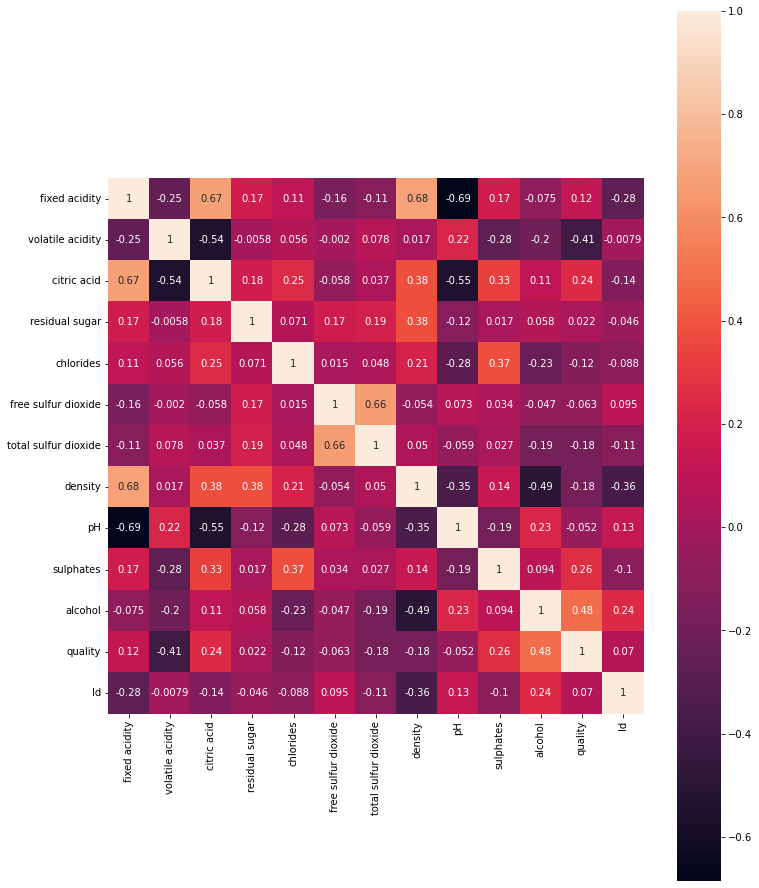

In [ ]:
#Mapa de Calor del DataFrame del Vino
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

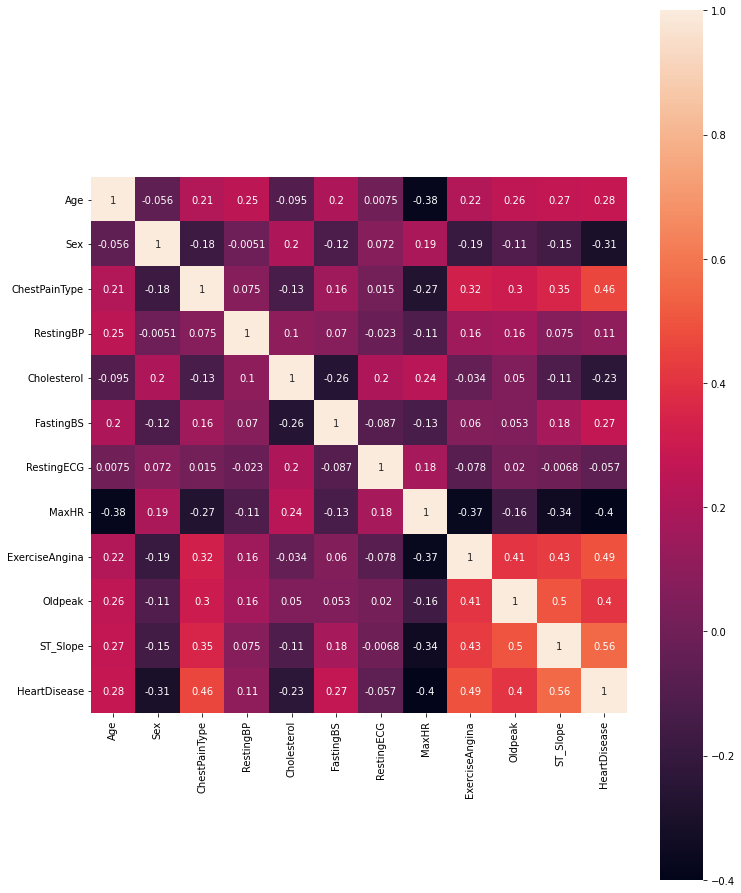

In [74]:
#Mapa de Calor de Enfermedad del corazon
plt.figure(figsize=(12, 16))
map_calor2 = sns.heatmap(data2.corr(),square = True, annot = True)
map_calor2

---

**La característica que tendremos en cuenta para el estudio será la Calidad del vino**



In [ ]:
#separamos datos de entrada y salida VINO
x_data = data.drop('quality', axis=1)
y_data = data['quality']

In [102]:
#separamos datos de entrada y salida HEART
x_data2 = data2.drop('HeartDisease', axis=1)
y_data2 = data2['HeartDisease']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [104]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2,y_data2, random_state=1, test_size=0.75)
data2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,1.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,0.0,0.0
1,49.0,2.0,2.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,1.0,130.0,283.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0
3,48.0,2.0,3.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,2.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,0.0,0.0


# **C** - Entrenamiento y Predicción

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [105]:
model2 = GaussianNB()
model2.fit(x_train2, y_train2)
y_predict2 = model2.predict(x_test2)

# ***D*** - Evaluación

In [ ]:
print(accuracy_score(y_test,y_predict)) #0.5093240093240093 - Tenemos un porcentaje del 50,93% de acierto
y_predict

In [ ]:
print(accuracy_score(y_test2,y_predict2)) #0.8345428156748912 - Tenemos un porcentaje del 83,45% de acierto
y_predict2

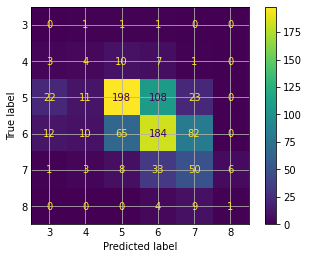

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

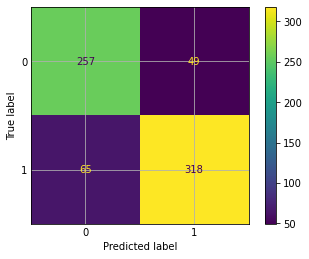

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test2, y_predict2)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)



---

## **E** - Optimización

MultinomialNB y ComplementNB

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print(accuracy_score(y_test,y_predict)) #0.32867132867132864 - Tenemos un porcentaje del 32,86% de acierto
y_predict

In [100]:
data2 = data2.mask(data2.lt(0)).ffill().fillna(0).astype('float64') #Debido a que tenemos un numero negativo y que el clasificador nos da error, cambiamos el numero a positivo

In [ ]:
model2 = MultinomialNB()
model2.fit(x_train2,y_train2)
y_predict2 = model2.predict(x_test2)
print(accuracy_score(y_test2,y_predict2)) #0.602322206095791 - Tenemos un porcentaje del 60,23% de acierto
y_predict2

In [ ]:
model3 = ComplementNB()
model3.fit(x_train2,y_train2)
y_predict2 = model3.predict(x_test2)
print(accuracy_score(y_test2,y_predict2)) #0.602322206095791 - Tenemos un porcentaje del 60,23% de acierto
y_predict2